In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [16]:
df = pd.read_csv('deliveries.csv', header=None)
print(df.head())

         0             1             2                      3             4   \
0  match_no          date         stage                  venue  batting_team   
1         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   
2         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   
3         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   
4         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   

             5        6     7        8          9            10      11    12  \
0  bowling_team  innings  over  striker     bowler  runs_of_bat  extras  wide   
1           RCB        1   0.1  de Kock  Hazlewood            0       0     0   
2           RCB        1   0.2  de Kock  Hazlewood            4       0     0   
3           RCB        1   0.3  de Kock  Hazlewood            0       0     0   
4           RCB        1   0.4  de Kock  Hazlewood            0       0     0   

        13    14       15       

In [17]:
columns = [
    'Match_ID', 'Date', 'Stage', 'Venue', 'Batting_Team', 'Bowling_Team',
    'Innings', 'Over_Ball', 'Batsman', 'Bowler', 'Runs_Scored', 'Extra_Runs',
    'Wides', 'No_Balls', 'Byes', 'Leg_Byes', 'Dismissal_Type', 'Dismissed_Player', 'Fielder'
]

df.columns = columns
print(df.head())

   Match_ID          Date         Stage                  Venue  Batting_Team  \
0  match_no          date         stage                  venue  batting_team   
1         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   
2         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   
3         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   
4         1  Mar 22, 2025  League stage  Eden Gardens, Kolkata           KKR   

   Bowling_Team  Innings Over_Ball  Batsman     Bowler  Runs_Scored  \
0  bowling_team  innings      over  striker     bowler  runs_of_bat   
1           RCB        1       0.1  de Kock  Hazlewood            0   
2           RCB        1       0.2  de Kock  Hazlewood            4   
3           RCB        1       0.3  de Kock  Hazlewood            0   
4           RCB        1       0.4  de Kock  Hazlewood            0   

  Extra_Runs Wides No_Balls  Byes Leg_Byes Dismissal_Type  Dismissed_Player  \
0     extras 

In [18]:
print("Shape of the dataset:", df.shape)
print(df.info())
print(df.describe(include='all'))

Shape of the dataset: (8029, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8029 entries, 0 to 8028
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_ID          8029 non-null   object
 1   Date              8029 non-null   object
 2   Stage             8029 non-null   object
 3   Venue             8029 non-null   object
 4   Batting_Team      8029 non-null   object
 5   Bowling_Team      8029 non-null   object
 6   Innings           8029 non-null   object
 7   Over_Ball         8029 non-null   object
 8   Batsman           8029 non-null   object
 9   Bowler            8029 non-null   object
 10  Runs_Scored       8029 non-null   object
 11  Extra_Runs        8029 non-null   object
 12  Wides             8029 non-null   object
 13  No_Balls          8029 non-null   object
 14  Byes              8029 non-null   object
 15  Leg_Byes          8029 non-null   object
 16  Dismissal_Type    423 non-n

In [19]:
print(df.isnull().sum())
df.fillna({'Dismissal_Type': 'Not Out', 'Dismissed_Player': 'None', 'Fielder': 'None'}, inplace=True)
print(df.isnull().sum())

Match_ID               0
Date                   0
Stage                  0
Venue                  0
Batting_Team           0
Bowling_Team           0
Innings                0
Over_Ball              0
Batsman                0
Bowler                 0
Runs_Scored            0
Extra_Runs             0
Wides                  0
No_Balls               0
Byes                   0
Leg_Byes               0
Dismissal_Type      7606
Dismissed_Player    7606
Fielder             7702
dtype: int64
Match_ID            0
Date                0
Stage               0
Venue               0
Batting_Team        0
Bowling_Team        0
Innings             0
Over_Ball           0
Batsman             0
Bowler              0
Runs_Scored         0
Extra_Runs          0
Wides               0
No_Balls            0
Byes                0
Leg_Byes            0
Dismissal_Type      0
Dismissed_Player    0
Fielder             0
dtype: int64


In [20]:
print("Unique values in 'Date':", df['Date'].unique())

df['Date'] = df['Date'].replace('date', pd.NA)

df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y', errors='coerce')

print("Data type of 'Date':", df['Date'].dtype)
print("First few rows of 'Date':\n", df['Date'].head())

numeric_cols = ['Runs_Scored', 'Extra_Runs', 'Wides', 'No_Balls', 'Byes', 'Leg_Byes']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

Unique values in 'Date': ['date' 'Mar 22, 2025' 'Mar 23, 2025' 'Mar 24, 2025' 'Mar 25, 2025'
 'Mar 26, 2025' 'Mar 27, 2025' 'Mar 28, 2025' 'Mar 29, 2025'
 'Mar 30, 2025' 'Mar 31, 2025' 'Apr 01, 2025' 'Apr 02, 2025'
 'Apr 03, 2025' 'Apr 04, 2025' 'Apr 05, 2025' 'Apr 06, 2025'
 'Apr 07, 2025' 'Apr 08, 2025' 'Apr 09, 2025' 'Apr 10, 2025'
 'Apr 11, 2025' 'Apr 12, 2025' 'Apr 13, 2025' 'Apr 14, 2025'
 'Apr 15, 2025' 'Apr 16, 2025' 'Apr 17, 2025' 'Apr 18, 2025']
Data type of 'Date': datetime64[ns]
First few rows of 'Date':
 0          NaT
1   2025-03-22
2   2025-03-22
3   2025-03-22
4   2025-03-22
Name: Date, dtype: datetime64[ns]
Match_ID                    object
Date                datetime64[ns]
Stage                       object
Venue                       object
Batting_Team                object
Bowling_Team                object
Innings                     object
Over_Ball                   object
Batsman                     object
Bowler                      object
Runs_Scored       

Total Runs Scored: 11510.0


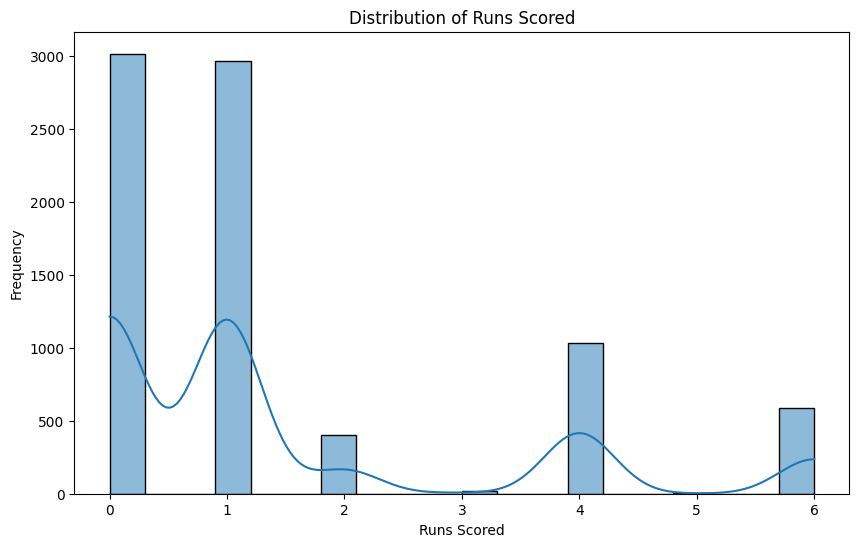

In [21]:
total_runs = df['Runs_Scored'].sum()
print("Total Runs Scored:", total_runs)

plt.figure(figsize=(10, 6))
sns.histplot(df['Runs_Scored'], bins=20, kde=True)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

Dismissal_Type
Not Out         7606
caught           294
bowled            65
lbw               28
runout            22
stumped           10
retired out        2
wicket_type        1
retired hurt       1
Name: count, dtype: int64


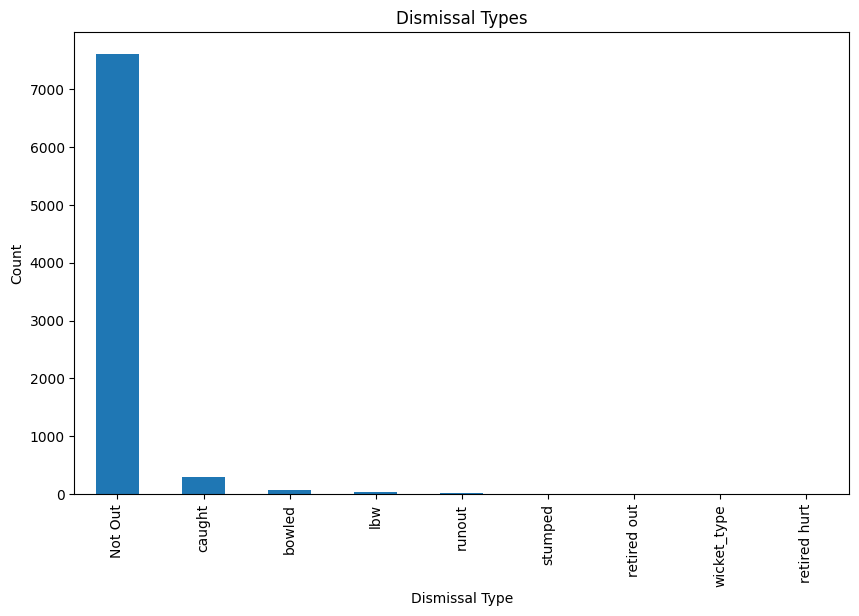

In [22]:
dismissal_counts = df['Dismissal_Type'].value_counts()
print(dismissal_counts)

plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='bar')
plt.title('Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.show()

Batsman
Pooran              357.0
Sai Sudharsan       329.0
Mitchell Marsh      295.0
Suryakumar Yadav    265.0
Shreyas Iyer        257.0
Kohli               249.0
Rahul               245.0
Head                242.0
Jaiswal             233.0
Priyansh Arya       232.0
Name: Runs_Scored, dtype: float64


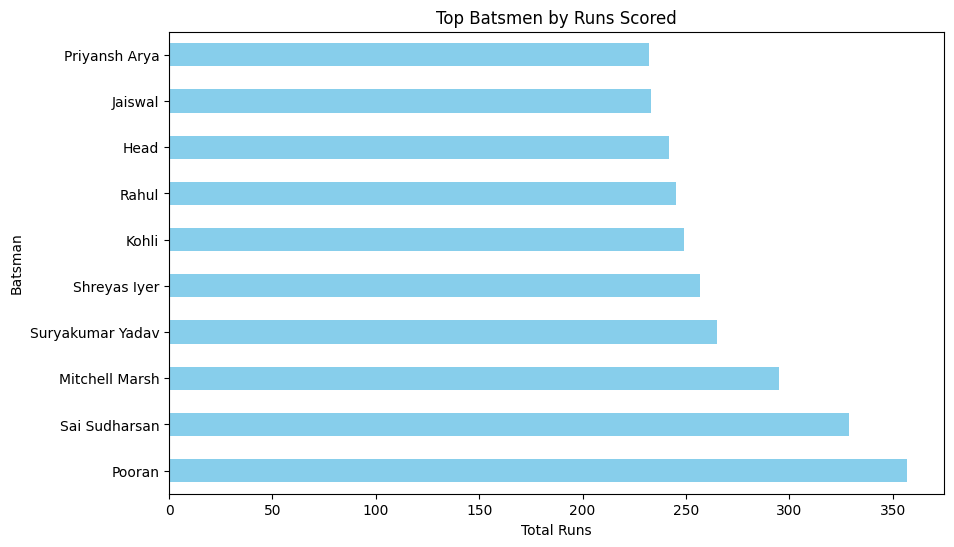

In [23]:
top_batsmen = df.groupby('Batsman')['Runs_Scored'].sum().sort_values(ascending=False).head(10)
print(top_batsmen)

plt.figure(figsize=(10, 6))
top_batsmen.plot(kind='barh', color='skyblue')
plt.title('Top Batsmen by Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

Bowler
Mitchell Starc    14
Hazlewood         12
Kuldeep Yadav     12
Khaleel Ahmed     12
Thakur            12
Noor Ahmad        12
Arshdeep Singh    11
Hardik Pandya     11
Harshit Rana      10
Sai Kishore       10
Name: Dismissal_Type, dtype: int64


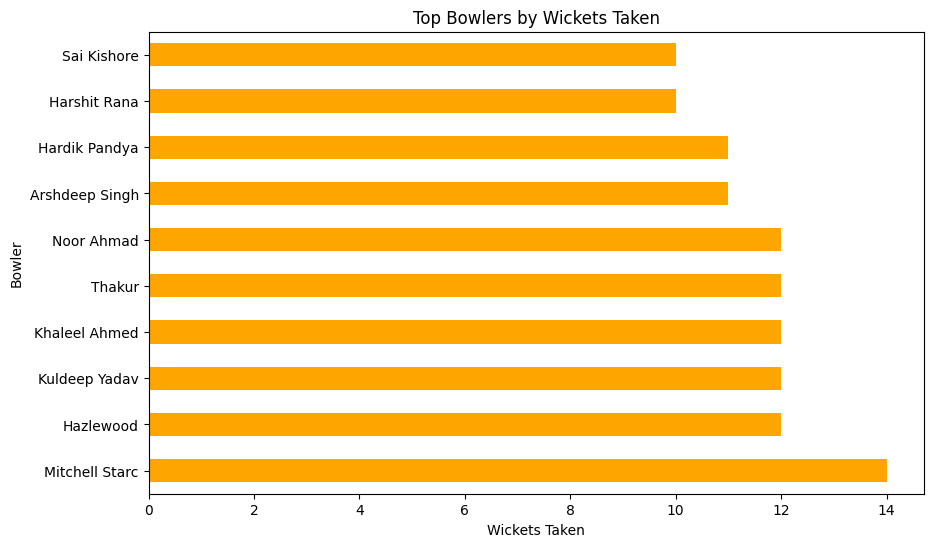

In [24]:
wickets_taken = df[df['Dismissal_Type'] != 'Not Out'].groupby('Bowler')['Dismissal_Type'].count().sort_values(ascending=False).head(10)
print(wickets_taken)

plt.figure(figsize=(10, 6))
wickets_taken.plot(kind='barh', color='orange')
plt.title('Top Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

Batting_Team
LSG             1297.0
RR              1254.0
SRH             1252.0
PBKS            1181.0
MI              1159.0
RCB             1143.0
GT              1087.0
DC              1069.0
CSK             1056.0
KKR             1012.0
batting_team       0.0
Name: Runs_Scored, dtype: float64


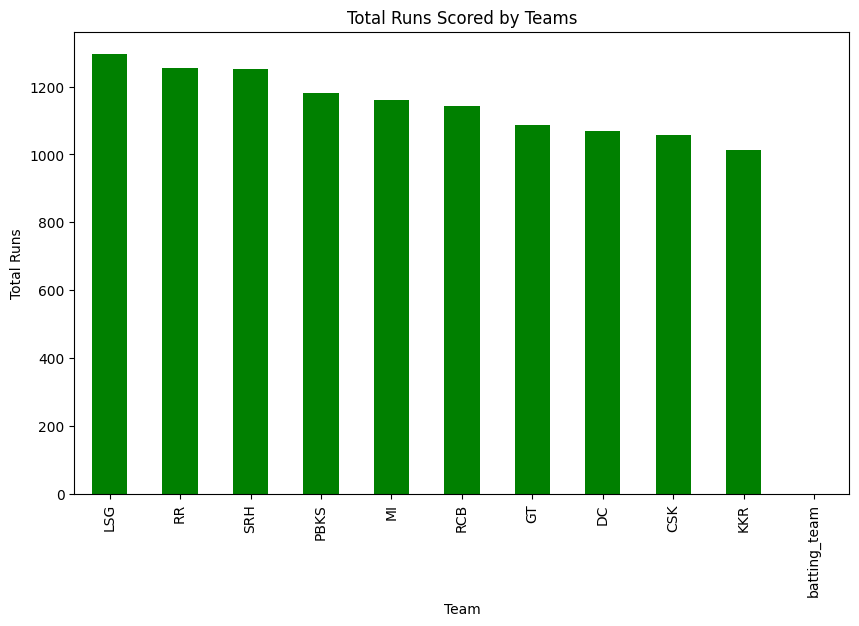

In [25]:
team_runs = df.groupby('Batting_Team')['Runs_Scored'].sum().sort_values(ascending=False)
print(team_runs)

plt.figure(figsize=(10, 6))
team_runs.plot(kind='bar', color='green')
plt.title('Total Runs Scored by Teams')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()

Venue
Rajiv Gandhi International Stadium, Hyderabad                                     1625.0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow             1375.0
MA Chidambaram Stadium, Chennai                                                   1143.0
Narendra Modi Stadium, Ahmedabad                                                  1130.0
Eden Gardens, Kolkata                                                             1080.0
Wankhede Stadium, Mumbai                                                           955.0
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur, Chandigarh     933.0
M.Chinnaswamy Stadium, Bengaluru                                                   823.0
Arun Jaitley Stadium, Delhi                                                        763.0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam                 715.0
Barsapara Cricket Stadium, Guwahati                                                633.0
Sawai Mansingh 

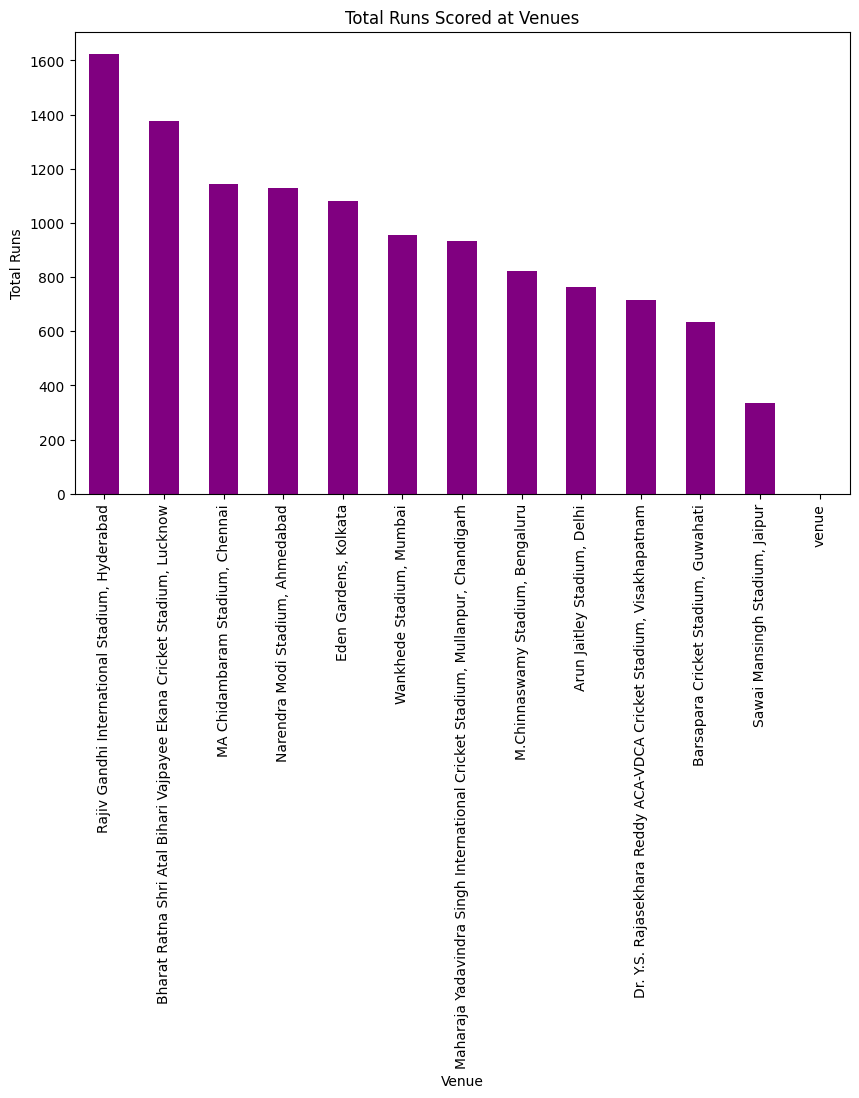

In [26]:
venue_runs = df.groupby('Venue')['Runs_Scored'].sum().sort_values(ascending=False)
print(venue_runs)

plt.figure(figsize=(10, 6))
venue_runs.plot(kind='bar', color='purple')
plt.title('Total Runs Scored at Venues')
plt.xlabel('Venue')
plt.ylabel('Total Runs')
plt.show()

In [27]:
print("The analysis highlights the top-performing batsmen, bowlers, and teams.")
print("Venues with high run-scoring potential were identified.")
print("Further analysis can focus on player-specific strategies and match outcomes.")

The analysis highlights the top-performing batsmen, bowlers, and teams.
Venues with high run-scoring potential were identified.
Further analysis can focus on player-specific strategies and match outcomes.


In [28]:
df.to_csv('processed_deliveries.csv', index=False)